Student ID: s223415148<br>
Student name: Kunhee Han<br>
Workshop: friday 8am - 10am

# Part 1

## 1.1

1.1.1

In [2]:
from google.colab import files

# This will prompt you to select a file from your local filesystem
uploaded = files.upload()


Saving transactionrecord.csv to transactionrecord.csv


In [3]:
!pip install wget # Installing wget

# The 'wget' package is a Python implementation of the popular command-line download tool.
# It allows you to download files from the internet programmatically within your Python scripts.

!pip install pyspark # Installing PySpark

# The 'pyspark' package is the Python API for Apache Spark, a distributed computing framework.
# PySpark enables you to process large datasets efficiently across a cluster of computers,
# making it an essential tool for big data analytics and processing tasks in Python.


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=010da5d0188236d1f27ad022e150881988b86f6b81a86fb79c362a293d17a5dc
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=bbf84869be8504f140b2e6102959f8932f482b1f5a82173741ae99cbe2af762e
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [4]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import when

# Get the existing SparkContext
sc = SparkContext.getOrCreate()

# Initialize SQLContext
sqlContext = SQLContext(sc)

# Path to the uploaded file
file_path = "transactionrecord.csv"  # The file is in the current directory after upload

# Read the CSV file into a DataFrame
spark_df = sqlContext.read.csv(file_path, header=True, inferSchema=True)

# Show the rows where 'CustomerNo' is 'NA'
na_rows = spark_df.filter(spark_df.CustomerNo == 'NA')
na_rows.show()

# the result shows there's no rows that has 'NA' on CustomerNo column.

# Replace 'NA' with '-1' in the 'CustomerNo' column
spark_df = spark_df.withColumn('CustomerNo', when(spark_df.CustomerNo == 'NA', '-1').otherwise(spark_df.CustomerNo))

# Show the DataFrame after replacement
spark_df.show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Product_category|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin V

1.1.2

In [5]:
from pyspark.sql.functions import regexp_replace, col  # Importing the necessary functions


# Process the 'productName' column to remove non-alphabet characters
spark_df = spark_df.withColumn('productName_process', regexp_replace(col('productName'), '[^a-zA-Z]', ''))

# Show the first 5 rows
spark_df.select('productName', 'productName_process').show(5)

+--------------------+--------------------+
|         productName| productName_process|
+--------------------+--------------------+
|Set Of 2 Wooden M...|SetOfWoodenMarket...|
|Christmas Star Wi...|ChristmasStarWish...|
|Storage Tin Vinta...|StorageTinVintage...|
|Tree T-Light Hold...|TreeTLightHolderW...|
|Set Of 4 Knick Kn...|SetOfKnickKnackTi...|
+--------------------+--------------------+
only showing top 5 rows



## 1.2

1.2.1

In [6]:
from pyspark import SparkContext  # Correct import for SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import col

# Calculate the revenue as price * Quantity and cast it to float
spark_df = spark_df.withColumn('revenue', (col('price') * col('Quantity')).cast('float'))

# Show the top 5 rows with the calculated revenue
spark_df.select('price', 'Quantity', 'revenue').show(5)

+-----+--------+-------+
|price|Quantity|revenue|
+-----+--------+-------+
|21.47|      12| 257.64|
|10.65|      36|  383.4|
|11.53|      12| 138.36|
|10.65|      12|  127.8|
|11.94|       6|  71.64|
+-----+--------+-------+
only showing top 5 rows



1.2.2

In [7]:
import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame
df = spark_df.toPandas()

# Convert the 'Date' column to a datetime format and create the 'transaction_date' column
df['transaction_date'] = pd.to_datetime(df['Date'])

# Show the top 5 rows of the Pandas DataFrame
print(df.head())

  TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

  Product_category  Price  Quantity CustomerNo         Country  \
0              0ca  21.47        12      17490  United Kingdom   
1              0ca  10.65        36      13069  United Kingdom   
2              0ca  11.53        12      13069  United Kingdom   
3              0ca  10.65        12      13069  United Kingdom   
4              0ca  11.94         6      13069  United Kingdom   

               productName_process     revenue transaction_date  
0          SetOfWoodenMarketCrates  257.640015       2019-12-09  
1  Chris

1.2.3

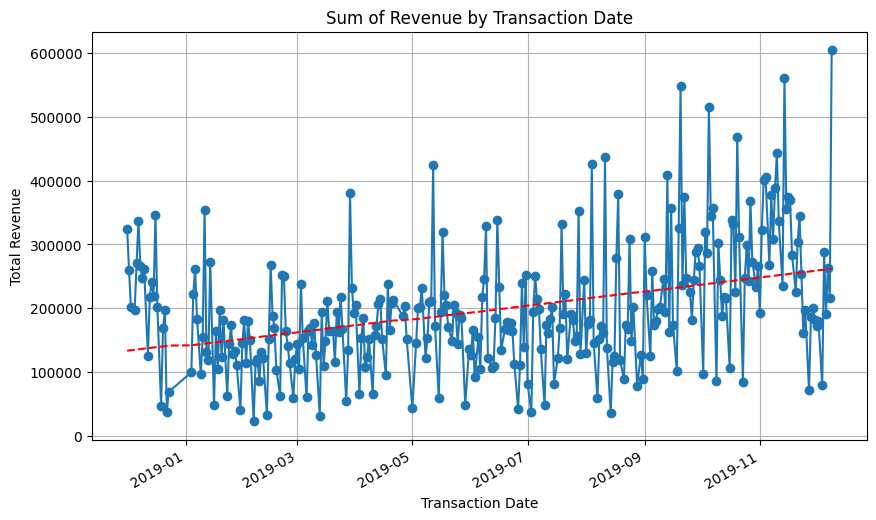

In [8]:
import matplotlib.pyplot as plt
import numpy as np


# Group by 'transaction_date' and calculate the sum of 'revenue'
revenue_by_date = df.groupby('transaction_date')['revenue'].sum()

# Plot the sum of revenue by date
plt.figure(figsize=(10, 6))
revenue_by_date.plot(kind='line', marker='o')

# Calculate the trend line (using NumPy's polyfit for a linear trend)
z = np.polyfit(range(len(revenue_by_date)), revenue_by_date.values, 1)
p = np.poly1d(z)

# Plot the trend line in red
plt.plot(revenue_by_date.index, p(range(len(revenue_by_date))), "r--", label='Trend Line')


# Add title and labels
plt.title('Sum of Revenue by Transaction Date')
plt.xlabel('Transaction Date')
plt.ylabel('Total Revenue')
plt.grid(True)

# Display the plot
plt.show()

The revenue data shows considerable fluctuations with multiple outliers, indicating instability over time. However, the upward trend is evident, as depicted by the red trend line, suggesting that despite the volatility, revenue is generally increasing.

## 1.3

1.3.1

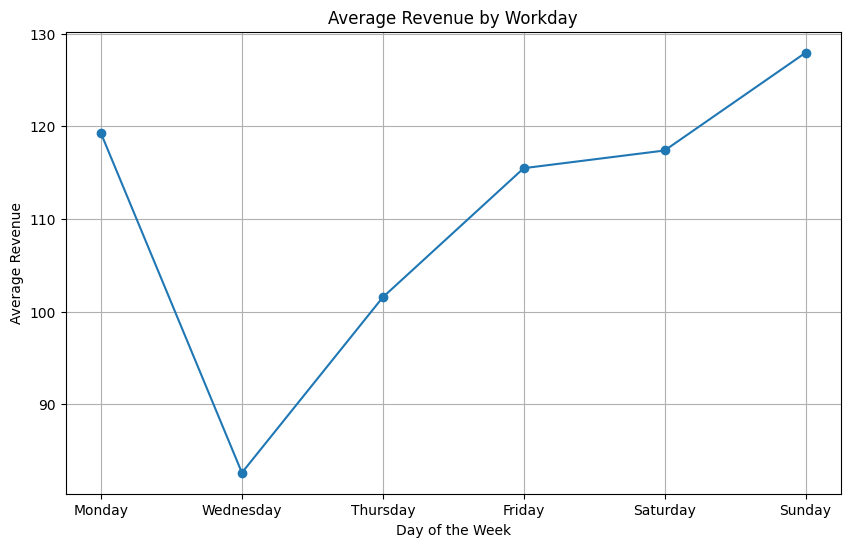

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a 'workday' column based on 'transaction_date'
df['workday'] = df['transaction_date'].dt.dayofweek  # Monday=0, Sunday=6

# Group by 'workday' and calculate the average revenue
average_revenue_by_workday = df.groupby('workday')['revenue'].mean()

# Map the workday numbers to their corresponding names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_revenue_by_workday.index = [day_names[day] for day in average_revenue_by_workday.index]

# Plot the results
plt.figure(figsize=(10, 6))
average_revenue_by_workday.plot(kind='line', marker='o')

# Add title and labels
plt.title('Average Revenue by Workday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Revenue')
plt.grid(True)

# Show the plot
plt.show()

It shows the highest average revenue on sunday.

1.3.2

In [ ]:
# Sunday corresponds to 6 in the day of the week
workday_num = 6
filtered_df = df[df['workday'] == workday_num] #Filter data for sunday

# Identify the Product with the Highest Revenue on That Workday
highest_revenue_product = filtered_df.groupby('productName_process')['revenue'].sum().idxmax()
highest_revenue_value = filtered_df.groupby('productName_process')['revenue'].sum().max()
print(f"The product with the highest revenue on Sunday is: {highest_revenue_product} with a revenue of {highest_revenue_value}")

#Identify the Product with the Highest Sales Volume (Sum of Quantity) on That Workday
highest_sales_volume_product = filtered_df.groupby('productName_process')['Quantity'].sum().idxmax()
highest_sales_volume_value = filtered_df.groupby('productName_process')['Quantity'].sum().max()
print(f"The product with the highest sales volume on Sunday is: {highest_sales_volume_product} with a sales volume of {highest_sales_volume_value}")


The product with the highest revenue on Sunday is: WorldWarGlidersAsstdDesigns with a revenue of 187081.34375
The product with the highest sales volume on Sunday is: WorldWarGlidersAsstdDesigns with a sales volume of 18051


1.3.3

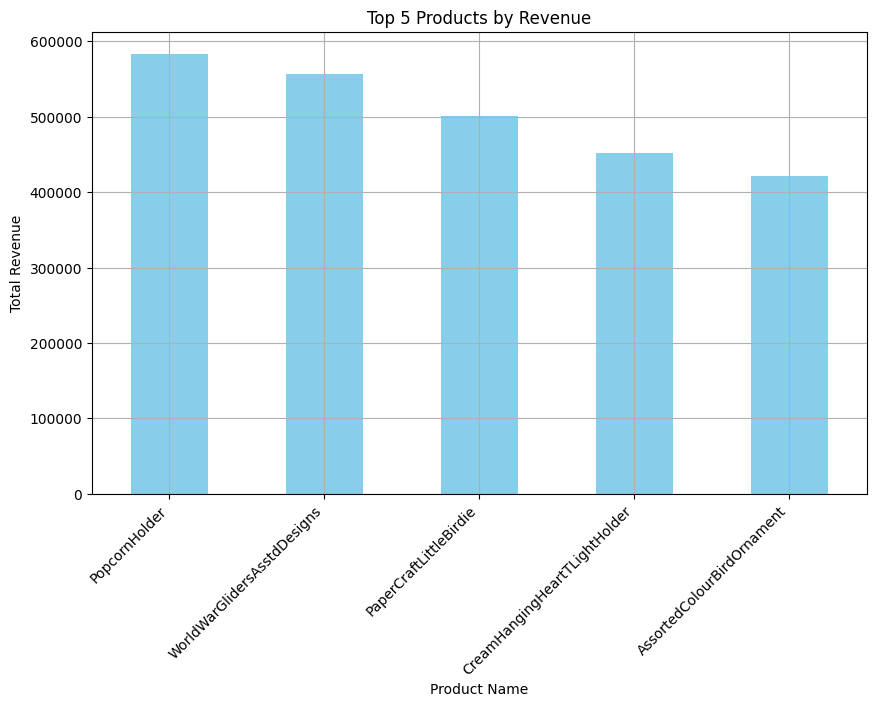

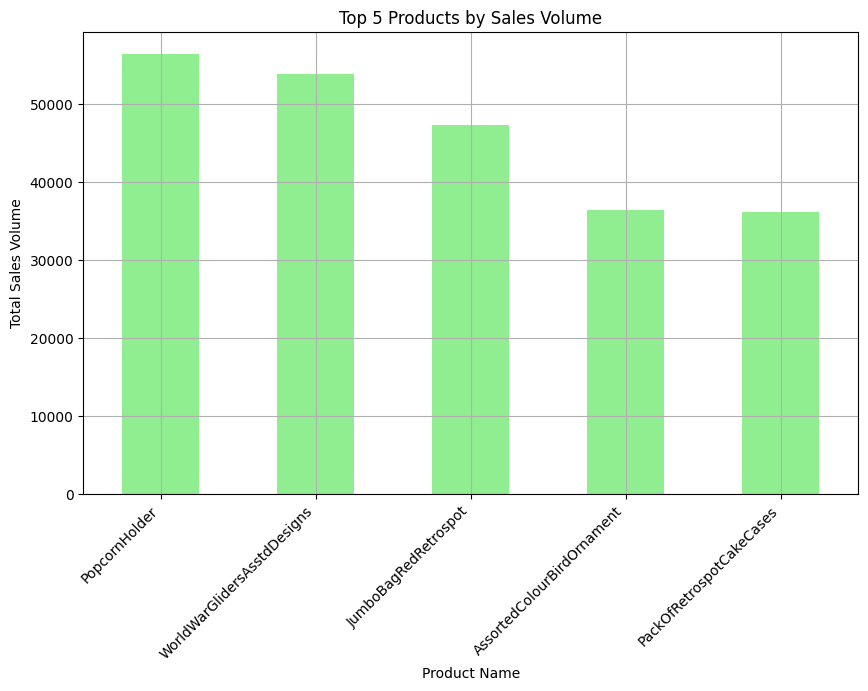

In [ ]:
# Group by productName_process and calculate total revenue and total sales volume
product_revenue = df.groupby('productName_process')['revenue'].sum().sort_values(ascending=False).head(5)
product_sales_volume = df.groupby('productName_process')['Quantity'].sum().sort_values(ascending=False).head(5)

# Plot the Top 5 Products by Revenue
plt.figure(figsize=(10, 6))
product_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Plot the Top 5 Products by Sales Volume
plt.figure(figsize=(10, 6))
product_sales_volume.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Products by Sales Volume')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## 1.4

In [ ]:
# Group by 'Country' and calculate total revenue
country_revenue = df.groupby('Country')['revenue'].sum().sort_values(ascending=False)

# Identify the country with the highest revenue
top_country = country_revenue.idxmax()
top_country_revenue = country_revenue.max()
print(f"The country with the highest revenue is: {top_country} with a total revenue of {top_country_revenue}")

top_country_df = df[df['Country'] == top_country]
# Extract the month from the 'transaction_date' column using .loc
top_country_df.loc[:, 'month'] = top_country_df['transaction_date'].dt.month

# Group by 'month' and calculate total revenue
monthly_revenue = top_country_df.groupby('month')['revenue'].sum().sort_values(ascending=False)

# Identify the month with the highest revenue
top_month = monthly_revenue.idxmax()
top_month_revenue = monthly_revenue.max()
print(f"The month with the highest revenue in {top_country} is: {top_month} with a total revenue of {top_month_revenue}")

The country with the highest revenue is: United Kingdom with a total revenue of 49994032.0
The month with the highest revenue in United Kingdom is: 11 with a total revenue of 6737640.0


<ipython-input-10-c4754fcdd65e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_country_df.loc[:, 'month'] = top_country_df['transaction_date'].dt.month


## 1.5

In [ ]:
# Filter out non-shopping transactions (quantity <= 0)
shopping_df = df[df['Quantity'] > 0]

# Calculate shopping frequency by counting distinct transactionNo for each customer
customer_frequency = shopping_df.groupby('CustomerNo')['TransactionNo'].nunique().sort_values(ascending=False)

# Identify the customer with the highest shopping frequency
most_frequent_customer = customer_frequency.idxmax()
most_frequent_customer_count = customer_frequency.max()
print(f"The customer who shops most frequently is: {most_frequent_customer} with {most_frequent_customer_count} distinct transactions")

# Analyze products purchased by this customer
customer_products = shopping_df[shopping_df['CustomerNo'] == most_frequent_customer]

# Summing the Quantity of products purchased by this customer
product_purchases = customer_products.groupby('productName_process')['Quantity'].sum().sort_values(ascending=False)

print(f"The products typically bought by customer {most_frequent_customer} are:\n")
print(product_purchases)



The customer who shops most frequently is: 12748 with 207 distinct transactions
The products typically bought by customer 12748 are:

productName_process
VictorianMetalPostcardSpring     595
WorldWarGlidersAsstdDesigns      480
RoseScentCandleJewelledDrawer    408
CartoonPencilSharpeners          405
SmallWhiteRetrospotMugInBox      390
                                ... 
PantryAppleCorer                   1
FrenchCarriageLantern              1
FrenchChateauLargePlatter          1
PairOfPinkFlowerClusterSlide       1
dVintageChristmasStickers          1
Name: Quantity, Length: 1750, dtype: int32


## 1.6

1.6.1

In [ ]:
# Filter out non-shopping transactions (quantity <= 0)
shopping_df = df[df['Quantity'] > 0]

# Group by transactionNo and aggregate product_category and productName_process into lists
basket_analysis = shopping_df.groupby('TransactionNo').agg({
    'Product_category': lambda x: list(x),
    'productName_process': lambda x: list(x)
}).reset_index()

# Show the resulting DataFrame
print(basket_analysis.head())

  TransactionNo                                   Product_category  \
0        536365                [0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]   
1        536366                                         [0ca, 0ca]   
2        536367  [0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...   
3        536368                               [0ca, 0ca, 0ca, 0ca]   
4        536369                                              [0ca]   

                                 productName_process  
0  [CreamHangingHeartTLightHolder, WhiteMoroccanM...  
1      [HandWarmerUnionJack, HandWarmerRedRetrospot]  
2  [AssortedColourBirdOrnament, PoppysPlayhouseBe...  
3  [JamMakingSetWithJars, RedCoatRackParisFashion...  
4                            [BathBuildingBlockWord]  


1.6.2

In [ ]:
# Define a function to remove adjacent duplicates
def remove_adjacent_duplicates(lst):
    return [v for i, v in enumerate(lst) if i == 0 or v != lst[i - 1]]

# Apply the function to the product_category lists
basket_analysis['Product_category'] = basket_analysis['Product_category'].apply(remove_adjacent_duplicates)

# Save the processed DataFrame as 'df_1' and print the top 10 rows
df_1 = basket_analysis
print(df_1.head(10))

  TransactionNo Product_category  \
0        536365            [0ca]   
1        536366            [0ca]   
2        536367            [0ca]   
3        536368            [0ca]   
4        536369            [0ca]   
5        536370            [0ca]   
6        536371            [0ca]   
7        536372            [0ca]   
8        536373            [0ca]   
9        536374            [0ca]   

                                 productName_process  
0  [CreamHangingHeartTLightHolder, WhiteMoroccanM...  
1      [HandWarmerUnionJack, HandWarmerRedRetrospot]  
2  [AssortedColourBirdOrnament, PoppysPlayhouseBe...  
3  [JamMakingSetWithJars, RedCoatRackParisFashion...  
4                            [BathBuildingBlockWord]  
5  [AlarmClockBakelikePink, AlarmClockBakelikeRed...  
6                          [PaperChainKitSChristmas]  
7      [HandWarmerRedRetrospot, HandWarmerUnionJack]  
8  [CreamHangingHeartTLightHolder, WhiteMoroccanM...  
9                          [VictorianSewingBoxLarge] 

## 1.7

1.7.1

In [ ]:
# Create a new column 'prod_len' to store the length of the lists in 'product_category'
df_1['prod_len'] = df_1['Product_category'].apply(len)

# Print the first five rows of the dataframe 'df_1'
print(df_1.head(5))

  TransactionNo Product_category  \
0        536365            [0ca]   
1        536366            [0ca]   
2        536367            [0ca]   
3        536368            [0ca]   
4        536369            [0ca]   

                                 productName_process  prod_len  
0  [CreamHangingHeartTLightHolder, WhiteMoroccanM...         1  
1      [HandWarmerUnionJack, HandWarmerRedRetrospot]         1  
2  [AssortedColourBirdOrnament, PoppysPlayhouseBe...         1  
3  [JamMakingSetWithJars, RedCoatRackParisFashion...         1  
4                            [BathBuildingBlockWord]         1  


In [ ]:
def data_processing(df_1, maxlength=3, minlength=1):
    # Step 1: Create the 'path' column by transforming the 'product_category' list into a string
    df_1['path'] = df_1['Product_category'].apply(lambda x: 'start > ' + ' > '.join(x) + ' > conversion')

    # Step 2: Clean up any potential formatting issues using str.replace()
    df_1['path'] = df_1['path'].str.replace('  ', ' ')  # This ensures no double spaces
    df_1['path'] = df_1['path'].str.replace('> >', '>')  # This removes any unintended '>>' occurrences

    # Step 3: Filter the DataFrame based on 'prod_len'
    df_1_filtered = df_1[(df_1['prod_len'] <= maxlength) & (df_1['prod_len'] >= minlength)]

    # Step 4: Return the new DataFrame without the list in 'path'
    return df_1_filtered

# Use df_1, apply the function with maxlength = 5 and minlength = 2
df_2 = data_processing(df_1, maxlength=5, minlength=2)

# Print the top 10 rows of the resulting dataframe 'df_2'
print(df_2.head(10))

   TransactionNo           Product_category  \
13        536378            [0ca, 1ca, 0ca]   
27        536395            [0ca, 1ca, 0ca]   
36        536404  [0ca, 1ca, 0ca, 4ca, 0ca]   
40        536408            [0ca, 1ca, 0ca]   
42        536412            [0ca, 4ca, 0ca]   
43        536415            [0ca, 1ca, 0ca]   
52        536464            [0ca, 1ca, 0ca]   
72        536532            [0ca, 1ca, 0ca]   
82        536542                 [0ca, 4ca]   
83        536544  [0ca, 1ca, 0ca, 4ca, 0ca]   

                                  productName_process  prod_len  \
13  [StrawberryCharlotteBag, ChildrensCutleryRetro...         3   
27  [BlackHeartCardHolder, AssortedColourBirdOrnam...         3   
36  [HeartIvoryTrellisSmall, ClearDrawerKnobAcryli...         5   
40  [MagicDrawingSlateDinosaur, MagicDrawingSlateB...         3   
42  [RoundSnackBoxesSetOfWoodland, RoundSnackBoxes...         3   
43  [CakeCasesVintageChristmas, PaperChainKitVinta...         3   
52  [BlackSwe

Student ID - s224770542   
Student Name - Ayaanulla Khan

**1**.**8**

1.8.1

In [ ]:
# TO check how many transactions end with the given pattern we can define a function
def count_end_transaction(df,pattern):
  return df['path'].apply(lambda x: x.endswith(pattern)).sum() #using list comprehension with endswith

# NOw we can define the patterns and use patterns variable to store it
patterns = ['> oca > conversion', '> 1ca > conversion','> 2ca > conversion','> 3ca > conversion','> 4ca > conversion']
# Lets count the transaction for patterns by calling the above user defined function
pat_count = {pattern: count_end_transaction(df_2,pattern) for pattern in patterns}
# the results can be viewed for each pattern using for loop
for pattern,count in pat_count.items():
  print('Transaction pattern = ', pattern, ': ',count)

Transaction pattern =  > oca > conversion :  0
Transaction pattern =  > 1ca > conversion :  26
Transaction pattern =  > 2ca > conversion :  144
Transaction pattern =  > 3ca > conversion :  68
Transaction pattern =  > 4ca > conversion :  198


1.8.2

In [ ]:
# Lets define a function to count occurenece of each pattern
def count_occur(df,pattern):
  return df['path'].apply(lambda x: x.count(pattern)).sum()
# defining and storing the required search patterns in the patts variable
patts = ['0ca > 0ca','0ca > 1ca','0ca > 2ca','0ca > 3ca','0ca > 4ca','0ca > conversion']
# counting the occurences for patterns by calling the above function
pat_occur = {pattern: count_occur(df_2, pattern) for pattern in patts}
# Lets print the outputs
for pattern, count in pat_occur.items():
    print('Number of occurences of ',pattern,' are ',count)

Number of occurences of  0ca > 0ca  are  0
Number of occurences of  0ca > 1ca  are  1222
Number of occurences of  0ca > 2ca  are  1137
Number of occurences of  0ca > 3ca  are  343
Number of occurences of  0ca > 4ca  are  1198
Number of occurences of  0ca > conversion  are  3056


1.8.3

In [ ]:
# Lets define a function to calculate how many times transaction contains 0ca
def count_0ca(df):
  return df['path'].apply(lambda x: x.count('0ca >')).sum() # summing the counts using list comprehension

count = count_0ca(df_2) # calling the above function for occurences output
print('Number of occurences of 0ca = ',count)# Printing the output

Number of occurences of 0ca =  6956


1.8.4

In [ ]:
# lets compute the sum of results of 1.8.2 divided by 1.8.3
finalsum = sum([c / count for c in pat_occur.values()]) # this code line is doing the calculation and storing the result into finalsum variable
print('The sum of the division result = ', finalsum)

The sum of the division result =  1.0


**1.9**

1.9.1

In [ ]:
import pandas as pd
# lets filter out the negative quantity transactions
f_df =df[df['Quantity']>0]
# Lets rank the products based on sum of quantity
top100 = f_df.groupby('productName_process')['Quantity'].sum().nlargest(100).index # selecting the top 100
# Now lets build the transaction level product data frame
df_top = f_df[f_df['productName_process'].isin(top100)]
# To use the pivot function we have to handle duplicate entries, hence i have aggregated the quantities
df_top_a = df_top.groupby(['TransactionNo', 'productName_process'])['Quantity'].sum().reset_index()
# Lets use pivot function of pandas
t_df = df_top_a.pivot(index='TransactionNo',columns='productName_process',values='Quantity')
t_df = t_df.fillna(0) # Replacing the NaN values with 0
t_df.tail() #lets view the last 5 rows

productName_process,AgedGlassSilverTLightHolder,AntiqueSilverTLightGlass,AssortedColourBirdOrnament,AssortedColoursSilkFan,AssortedFlowerColourLeis,AsstdDesigndPaperStickers,BaggSwirlyMarbles,BlackRecordCoverFrame,BrocadeRingPurse,BubblegumRingAssorted,...,StrawberryCharlotteBag,SweetheartFairyCakeCases,TeatimeFairyCakeCases,TravelCardWalletKeepCalm,VictorianGlassHangingTLight,VintageSnapCards,WoodenHeartChristmasScandinavian,WoodenStarChristmasScandinavian,WoodlandCharlotteBag,WorldWarGlidersAsstdDesigns
TransactionNo,,,,,,,,,,,,,,,,,,,,,
581579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,12.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
581587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1.9.2

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
# Filtering out transactions that have 4 or more items
t_df['item_count'] = (t_df>0).sum(axis = 1) # creating a column item_count with the total count of items
t_dfs = t_df[t_df['item_count']>= 4] # creating a dataframe with item_count greater than 4
t_d = t_dfs.drop('item_count',axis=1) # dropping the item count column
t_d = t_d.applymap(lambda x: 1 if x>0 else 0) # converting the data frame to binary so that it can be evaluated by apriori function
# lets run the apriori function with minimum support of 1.5%
freq_itemset = apriori(t_d, min_support=0.015,use_colnames=True)
freq_itemset.head()

<ipython-input-21-566ddd6f3acf>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  t_d = t_d.applymap(lambda x: 1 if x>0 else 0) # converting the data frame to binary so that it can be evaluated by apriori function
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.031276,(AgedGlassSilverTLightHolder)
1,0.085835,(AntiqueSilverTLightGlass)
2,0.126928,(AssortedColourBirdOrnament)
3,0.054698,(AssortedColoursSilkFan)
4,0.057083,(BaggSwirlyMarbles)


**1.9.3 **

In [ ]:
# Apriori algorithm with support > = 1.0%, hence i used 2%(0.02) based on my RAM performance
freq_item_lift = apriori(t_d,min_support = 0.02, use_colnames=True)
# Associated rules with lift > 10
lift_rule = association_rules(freq_item_lift,metric="lift",min_threshold = 10)
# lets see the resulted output
lift_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(WoodenStarChristmasScandinavian),(WoodenHeartChristmasScandinavian),0.053296,0.054979,0.042637,0.800000,14.551020,0.039707,4.725105,0.983704
1,(WoodenHeartChristmasScandinavian),(WoodenStarChristmasScandinavian),0.054979,0.053296,0.042637,0.775510,14.551020,0.039707,4.217136,0.985456
2,"(StrawberryCharlotteBag, CharlotteBagSukiDesign)","(LunchBagCarsBlue, CharlotteBagPinkPolkadot)",0.057363,0.035063,0.020898,0.364303,10.389927,0.018886,1.517920,0.958750
3,"(StrawberryCharlotteBag, CharlotteBagPinkPolka...","(LunchBagCarsBlue, CharlotteBagSukiDesign)",0.052314,0.038149,0.020898,0.399464,10.471239,0.018902,1.601654,0.954431
4,"(LunchBagCarsBlue, CharlotteBagSukiDesign)","(StrawberryCharlotteBag, CharlotteBagPinkPolka...",0.038149,0.052314,0.020898,0.547794,10.471239,0.018902,2.095696,0.940374


**1.9.4**

In [ ]:
# Example 1 with support >=2.5%, confidence >=50% and Lift >=2
Ex1 = association_rules(freq_itemset,metric = 'confidence',min_threshold = 0.5)
Ex1 = Ex1[Ex1['lift']>=2]
Ex1 = Ex1[Ex1['support']>=0.025]

# Example 2 with support >=3%, confidence >=60% and Lift >=5
Ex2 = association_rules(freq_itemset,metric = 'confidence',min_threshold = 0.6)
Ex2 = Ex2[Ex2['lift']>=5]
Ex2 = Ex2[Ex2['support']>=0.03]

# Example 3 with support >=1.5%, confidence >=40% and Lift >=3
Ex3 = association_rules(freq_itemset,metric = 'confidence',min_threshold = 0.4)
Ex3 = Ex3[Ex3['lift']>=3]
Ex3 = Ex3[Ex3['support']>=0.015]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Ex1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CakeCasesVintageChristmas),(PaperChainKitSChristmas),0.070687,0.115568,0.035344,0.500000,4.326456,0.027174,1.768864,0.827347
1,(CharlotteBagPinkPolkadot),(CharlotteBagSukiDesign),0.098177,0.113324,0.056381,0.574286,5.067645,0.045256,2.082796,0.890052
2,(RedRetrospotCharlotteBag),(CharlotteBagPinkPolkadot),0.135063,0.098177,0.072230,0.534787,5.447189,0.058970,1.938517,0.943906
3,(CharlotteBagPinkPolkadot),(RedRetrospotCharlotteBag),0.098177,0.135063,0.072230,0.735714,5.447189,0.058970,3.272734,0.905298
4,(StrawberryCharlotteBag),(CharlotteBagPinkPolkadot),0.096213,0.098177,0.052314,0.543732,5.538297,0.042868,1.976520,0.906673
...,...,...,...,...,...,...,...,...,...,...
6028,"(WoodlandCharlotteBag, StrawberryCharlotteBag,...","(RedRetrospotCharlotteBag, CharlotteBagSukiDes...",0.036886,0.070407,0.028612,0.775665,11.016921,0.026014,4.143780,0.944053
6029,"(CharlotteBagPinkPolkadot, CharlotteBagSukiDes...","(WoodlandCharlotteBag, StrawberryCharlotteBag,...",0.056381,0.045722,0.028612,0.507463,11.098800,0.026034,1.937473,0.964267
6030,"(WoodlandCharlotteBag, CharlotteBagPinkPolkadot)","(StrawberryCharlotteBag, RedRetrospotCharlotte...",0.054839,0.046704,0.028612,0.521739,11.171171,0.026050,1.993255,0.963311
6031,"(WoodlandCharlotteBag, StrawberryCharlotteBag)","(CharlotteBagPinkPolkadot, RedRetrospotCharlot...",0.056522,0.046003,0.028612,0.506203,11.003752,0.026011,1.931964,0.963585


we can observe 854 moderately frequent product combinations,
indicating many products are often bought together. Based on the confidence score each
pair has a 50% chance of being purchased together. Hence this makes these combinations suitable
for strategic promotions or bundled offers.

In [ ]:
Ex2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CharlotteBagPinkPolkadot),(RedRetrospotCharlotteBag),0.098177,0.135063,0.072230,0.735714,5.447189,0.058970,3.272734,0.905298
2,(DollyGirlLunchBox),(SpaceboyLunchBox),0.105189,0.107013,0.068163,0.648000,6.055360,0.056906,2.536896,0.932999
3,(SpaceboyLunchBox),(DollyGirlLunchBox),0.107013,0.105189,0.068163,0.636959,6.055360,0.056906,2.464767,0.934904
15,(PaperChainKitVintageChristmas),(PaperChainKitSChristmas),0.086816,0.115568,0.062833,0.723748,6.262528,0.052800,3.201540,0.920209
16,(StrawberryCharlotteBag),(RedRetrospotCharlotteBag),0.096213,0.135063,0.067041,0.696793,5.159018,0.054046,2.852628,0.891985
...,...,...,...,...,...,...,...,...,...,...
2250,"(WoodlandCharlotteBag, StrawberryCharlotteBag,...",(RedRetrospotCharlotteBag),0.042356,0.135063,0.036466,0.860927,6.374258,0.030745,6.219308,0.880410
2251,"(WoodlandCharlotteBag, RedRetrospotCharlotteBa...",(StrawberryCharlotteBag),0.046985,0.096213,0.036466,0.776119,8.066664,0.031945,4.036914,0.919222
2252,"(StrawberryCharlotteBag, RedRetrospotCharlotte...",(WoodlandCharlotteBag),0.046704,0.107293,0.036466,0.780781,7.277081,0.031455,4.072211,0.904842
2253,"(WoodlandCharlotteBag, StrawberryCharlotteBag)","(RedRetrospotCharlotteBag, CharlotteBagSukiDes...",0.056522,0.070407,0.036466,0.645161,9.163347,0.032486,2.619763,0.944240


There are 89 rules in the above example indicating very strong but infrequent product pairing. These candidates having confidence >= 60% and a lift >= 5 are excellent candidates for bundling or joint promotions. Hence these pairs occur in 3% or more transactions.

In [ ]:
Ex3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(BaggSwirlyMarbles),(VintageSnapCards),0.057083,0.095231,0.022861,0.400491,4.205455,0.017425,1.509184,0.808357
2,(CakeCasesVintageChristmas),(PaperChainKitSChristmas),0.070687,0.115568,0.035344,0.500000,4.326456,0.027174,1.768864,0.827347
3,(CakeCasesVintageChristmas),(PaperChainKitVintageChristmas),0.070687,0.086816,0.030575,0.432540,4.982242,0.024438,1.609247,0.860084
4,(CharlotteBagSukiDesign),(CharlotteBagPinkPolkadot),0.113324,0.098177,0.056381,0.497525,5.067645,0.045256,1.794762,0.905257
5,(CharlotteBagPinkPolkadot),(CharlotteBagSukiDesign),0.098177,0.113324,0.056381,0.574286,5.067645,0.045256,2.082796,0.890052
...,...,...,...,...,...,...,...,...,...,...
11019,"(LunchBagWoodland, LunchBagPinkPolkadot, Lunch...","(LunchBagSpaceboyDesign, LunchBagRedRetrospot,...",0.033240,0.041234,0.015147,0.455696,11.051408,0.013777,1.761453,0.940785
11020,"(LunchBagSpaceboyDesign, LunchBagPinkPolkadot,...","(LunchBagWoodland, LunchBagRedRetrospot, Lunch...",0.036886,0.043478,0.015147,0.410646,9.444867,0.013544,1.623001,0.928366
11021,"(LunchBagSpaceboyDesign, LunchBagWoodland, Lun...","(LunchBagRedRetrospot, LunchBagPinkPolkadot, L...",0.036466,0.046424,0.015147,0.415385,8.947711,0.013454,1.631118,0.921856
11022,"(LunchBagWoodland, LunchBagPinkPolkadot, Lunch...","(LunchBagSpaceboyDesign, LunchBagRedRetrospot,...",0.033380,0.046003,0.015147,0.453782,9.864214,0.013612,1.746549,0.929655


Here we can observe 9872 rules indicating many lower frequency combinations. The lift and the confidence indicate that these items are commonly bought together but not as frequently as the combinations of example 1 and 2. we can use the combinations for cross-selling strategies.

**1.10**

1.10.1

In [ ]:
df_10 = df[df['Quantity']>0] # filtering out the negative quantity transactions
# selecting top 100 products by total quantity and storing them in top100 variable
top = df_10.groupby('productName_process')['Quantity'].sum().nlargest(100).index
top100_df = df_10[df_10['productName_process'].isin(top)]# creating a dataframe with top 100 products
top100_df = top100_df.groupby(['CustomerNo', 'productName_process'])['Quantity'].sum().reset_index() # aggregating the Quantity values for further operations using pivot
# using the pivot function we can form the N by M matrix and fill NaN with 0 using fillna
topdf = top100_df.pivot(index='CustomerNo',columns='productName_process',values='Quantity').fillna(0)
topdf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


productName_process,AgedGlassSilverTLightHolder,AntiqueSilverTLightGlass,AssortedColourBirdOrnament,AssortedColoursSilkFan,AssortedFlowerColourLeis,AsstdDesigndPaperStickers,BaggSwirlyMarbles,BlackRecordCoverFrame,BrocadeRingPurse,BubblegumRingAssorted,...,StrawberryCharlotteBag,SweetheartFairyCakeCases,TeatimeFairyCakeCases,TravelCardWalletKeepCalm,VictorianGlassHangingTLight,VintageSnapCards,WoodenHeartChristmasScandinavian,WoodenStarChristmasScandinavian,WoodlandCharlotteBag,WorldWarGlidersAsstdDesigns
CustomerNo,,,,,,,,,,,,,,,,,,,,,
12004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12008,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0
12025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0
18281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1.10.2

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean = euclidean_distances(topdf) # calculating the euclidean distance
customerdist = pd.DataFrame(euclidean,index = topdf.index,columns = topdf.index) #converting the results to a dataframe
customerdist # to view the matrix of euclidean distances between customer numbers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerNo,12004,12008,12025,12026,12031,12042,12043,12050,12057,12063,...,18269,18270,18272,18274,18276,18277,18281,18282,18283,18287
CustomerNo,,,,,,,,,,,,,,,,,,,,,
12004,0.000000,42.130749,13.152946,10.049876,9.949874,22.068076,19.416488,8.426150,33.852622,8.774964,...,22.516660,14.798649,136.216739,20.000000,48.445846,28.548205,13.228757,14.000000,99.005050,42.649736
12008,42.130749,0.000000,43.474130,41.737274,42.308392,46.130250,44.384682,41.737274,53.656314,42.000000,...,47.853944,43.657760,139.807010,45.683695,45.978256,50.019996,43.150898,43.116122,107.791465,59.816386
12025,13.152946,43.474130,0.000000,15.231546,9.899495,24.859606,19.390719,13.266499,32.326460,14.142136,...,27.820855,18.493242,137.542721,22.869193,49.699095,30.626786,17.262677,17.860571,97.483332,45.144213
12026,10.049876,41.737274,15.231546,0.000000,9.695360,20.542639,21.954498,6.782330,37.080992,6.000000,...,24.698178,13.341664,135.535973,18.947295,48.020829,27.820855,11.575837,12.449900,99.413279,43.011626
12031,9.949874,42.308392,9.899495,9.695360,0.000000,22.181073,20.248457,7.211103,33.985291,7.874008,...,25.219040,14.282857,137.040140,19.621417,48.290786,28.284271,12.649111,13.453624,99.191734,43.588989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277,28.548205,50.019996,30.626786,27.820855,28.284271,34.351128,34.496377,27.422618,46.076024,27.239677,...,36.276714,29.732137,139.499104,32.634338,54.881691,0.000000,28.982753,29.342802,100.930669,50.793700
18281,13.228757,43.150898,17.262677,11.575837,12.649111,23.237900,23.452079,10.583005,38.509739,10.099505,...,26.000000,15.620499,137.186005,20.615528,48.703183,28.982753,0.000000,14.866069,98.949482,44.045431
18282,14.000000,43.116122,17.860571,12.449900,13.453624,23.086793,23.895606,11.532563,38.470768,11.090537,...,26.400758,16.278821,137.262522,10.862780,48.918299,29.342802,14.866069,0.000000,100.757134,44.283180


**1.10.3**

In [ ]:
# lets create a user defined function to compute top 3 most similars to given IDs
def top_similar(customer_no,distance,topn = 3):
  similars = distance[customer_no].sort_values() # sorting the values to identify top 3
  return similars[similars > 0].head(topn) # displaying only the top 3 using head()
# Finding top 3 similar to 13069
similar_13069 = top_similar('13069',customerdist) # passing arguments to the function
print('Top 3 similar customers to 13069 are :')
print(similar_13069, '\n')
#Finding top 3 similar to 17490
similar_17490 = top_similar('17490',customerdist) # passing arguments to the function
print('Top 3 similar customers to 17490 are :')
print(similar_17490)


Top 3 similar customers to 13069 are :
CustomerNo
15118     598.369451
17523    1449.092820
18179    1734.755891
Name: 13069, dtype: float64 

Top 3 similar customers to 17490 are :
CustomerNo
12519    26.00000
12582    26.00000
12652    26.70206
Name: 17490, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.10.4

Code Logic:

1 - Filter out the topdf matrix for customer number 13069 and identify the missing values/ product with 0 quantity.

2 - Analyse similar purchases of the top customers who were identified in the above coding questions. Aggregate the data to identify the products which are frequently purchased by these similar customers.

3 - order the output or rank them based on the total quantity purchased by similar customers.



In [ ]:
missingprd = topdf.loc['13069'][topdf.loc['13069']==0].index
missingprd # to view missing products for customer no 13069
# Lets Aggregate purchases of missing products from similar customers
similarpurchase = topdf.loc[similar_13069.index]
recommend = similarpurchase[missingprd].sum().sort_values(ascending = False)
recommend.head(10) # top 10 similar purchases

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
productName_process,
MiniPaintSetVintage,36.0
AssortedFlowerColourLeis,24.0
PackOfRetrospotCakeCases,24.0
DoughnutLipGloss,20.0
PaperChainKitVintageChristmas,18.0
PleaseOnePersonMetalSign,12.0
JumboBagScandinavianBluePaisley,10.0
JumboShopperVintageRedPaisley,10.0
BlackRecordCoverFrame,4.0


The steps to recommend products are as follows:

1 - Identifying the missing products not bought by the customer.

2 - Identifying similar customers who have similar shopping behaviour.

3 - Aggregate similar purchases by calculating how frequently similar customers purchase the missing products

4 - identifying the top popular choices of the similar customers.

# Part 2: Sales Prediction

## 2.1

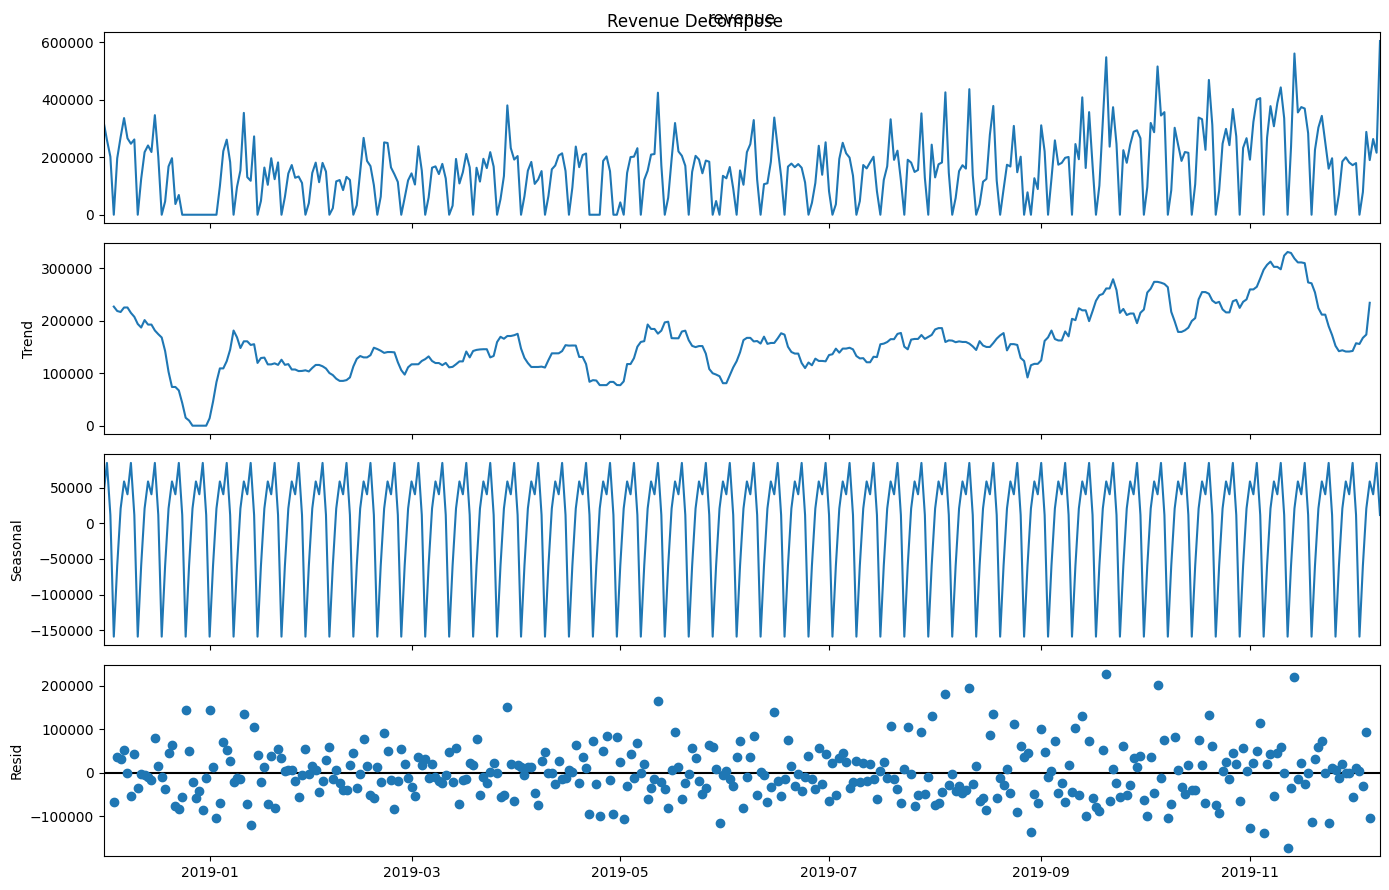

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Select only 'transaction_date' and 'revenue'
df_revenue = df[['transaction_date', 'revenue']]

# Create complete date range
full_date_range = pd.date_range(df_revenue['transaction_date'].min(), df_revenue['transaction_date'].max())

# Find missing dates by comparing the complete range with the dates in the dataset
existing_dates = df_revenue['transaction_date'].unique()
missing_dates = full_date_range.difference(existing_dates)
# print(f"Missing dates: {missing_dates}")

# Create new rows with missing dates and mean revenue
missing_rows = pd.DataFrame({
    'transaction_date': missing_dates,
    'revenue': df_revenue['revenue'].mean()
})

# Append the missing rows to the original dataframe
df_revenue_full = pd.concat([df_revenue, missing_rows], ignore_index=True)

# Sort by transaction_date to ensure the time series is ordered correctly
df_revenue_full = df_revenue_full.sort_values('transaction_date')

# Decompose the time series (aggregating by date since we may have duplicate dates)
revenue_by_date = df_revenue_full.groupby('transaction_date')['revenue'].sum()

# Decompose the time series with the additive model
decomposition = seasonal_decompose(revenue_by_date, model='additive')

plt.rcParams["figure.figsize"] = (14,9)
decomposition.plot().suptitle('Revenue Decompose', fontsize=12)
plt.show()

**Observed (First plot):** The overall revenue time series shows regular fluctuations with occasional spikes. It seems to have consistent variations but with notable peaks during certain periods.

**Trend (Second plot):** The trend component shows the underlying movement of revenue over time, excluding seasonal and residual factors. The trend dips significantly early in the time frame but gradually increases afterward, showing some recovery toward the end.
This indicates there is a long-term underlying pattern, but it is affected by fluctuations.

**Seasonal (Third plot):** The seasonal component shows a clear repeating pattern that occurs at regular intervals, confirming a strong seasonality effect in the data. The peaks and troughs are consistently repeating across the entire time frame, implying that the revenue varies systematically over periods (likely weekly or monthly).
The amplitude of the seasonality remains stable over time, with no significant changes in the magnitude of the peaks.

**Residual (Fourth plot):** The residuals represent the remaining part of the series after removing the trend and seasonality. The residuals are fairly scattered, showing no clear pattern, which suggests that the model captured the systematic components (trend and seasonality) well.
The residuals do not exhibit any significant upward or downward trend, indicating that the remaining noise in the data is random.

**Solution**

* The solution starts by using the dataframe from question 1.2, identifying missing dates by generating a full date range and filling them with the mean revenue value to ensure continuity. The data is sorted by date and aggregated by day using groupby(), preparing it for time series decomposition. The seasonal_decompose() function is applied with an additive model to analyse underlying trends, seasonal patterns, and the behavior of residuals.

* Another solution could involve iterating through the original dataframe and directly inserting rows for the missing dates, but this would be more computationally expensive and less efficient than concatenation.

* I believe, this solution is optimal because concatenating the missing dates to the original dataframe avoids the overhead of manipulating the entire dataframe, making it faster and more efficient.

## 2.2

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# Train-Test split: (Jan 01 - Oct 01) for the train and (Oct 01 - Nov 01) as a test
train_data = revenue_by_date.loc['2018-12-31':'2019-10-01']
test_data = revenue_by_date.loc['2019-10-02':'2019-11-01']

# Dictionary to store MAE for each (p, d, q) combination
mae_dict = {}

# Define the range of p, d, q
p_values = [0, 1, 2]
d_values = [0, 1, 2]
q_values = [0, 1, 2]

# Create lists to store train data and predicted values
history = [x for x in train_data]
predictions = list()

# Total number of iterations (27)
total_iterations = len(p_values) * len(d_values) * len(q_values)
current_iteration = 0
# Grid search
for p in p_values:
  for d in d_values:
    for q in q_values:
      # Walk-forward validation on test data
      for t in range(len(test_data)):
          # Fit ARIMA model with current (p, d, q) settings
          model = ARIMA(history, order=(p, d, q))
          model_fit = model.fit()
          # Forecast the next value
          output = model_fit.forecast()
          forecast = output[0]
          predictions.append(forecast)
          # Get the true observed value and append it to the history
          observe = test_data.iloc[t]
          history.append(observe)
      # Calculate MAE for the current (p, d, q) model
      mae = mean_absolute_error(test_data, predictions)
      # Store MAE in the dictionary
      mae_dict[(p, d, q)] = mae
      # Reset the history and predictions for the next iteration
      history = [x for x in train_data]
      predictions = list()

      # Show progress in console
      current_iteration += 1
      print(f"Iteration {current_iteration}/{total_iterations} completed for ARIMA({p}, {d}, {q}). MAE: {mae}")

# Output the best model and its MAE
best_model = min(mae_dict, key=mae_dict.get)
best_mae = mae_dict[best_model]
print(f'\n\n\nBest ARIMA Model: Order(p,d,q) = {best_model} with MAE: {best_mae}')

Iteration 1/27 completed for ARIMA(0, 0, 0). MAE: 135394.89999218966
Iteration 2/27 completed for ARIMA(0, 0, 1). MAE: 108707.46824267587
Iteration 3/27 completed for ARIMA(0, 0, 2). MAE: 107726.42378201
Iteration 4/27 completed for ARIMA(0, 1, 0). MAE: 133526.69895639727
Iteration 5/27 completed for ARIMA(0, 1, 1). MAE: 110070.26767039261
Iteration 6/27 completed for ARIMA(0, 1, 2). MAE: 91939.4500789445
Iteration 7/27 completed for ARIMA(0, 2, 0). MAE: 223284.65317117018
Iteration 8/27 completed for ARIMA(0, 2, 1). MAE: 133926.27794975985
Iteration 9/27 completed for ARIMA(0, 2, 2). MAE: 105353.2417315153
Iteration 10/27 completed for ARIMA(1, 0, 0). MAE: 110069.65961697607
Iteration 11/27 completed for ARIMA(1, 0, 1). MAE: 108092.12511055962
Iteration 12/27 completed for ARIMA(1, 0, 2). MAE: 112028.66539612255
Iteration 13/27 completed for ARIMA(1, 1, 0). MAE: 124413.43560938704
Iteration 14/27 completed for ARIMA(1, 1, 1). MAE: 99988.87743258648
Iteration 15/27 completed for ARIMA(

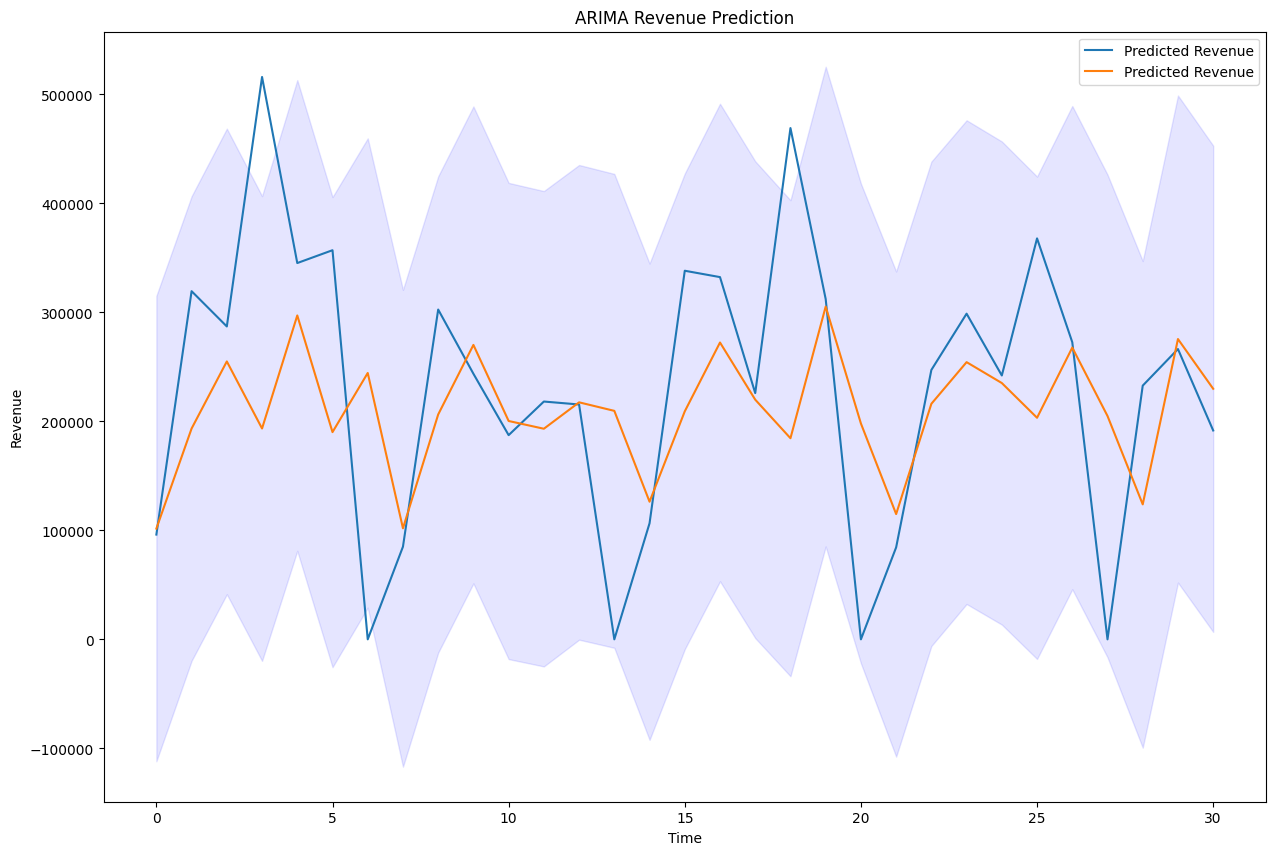

In [ ]:
from matplotlib import pyplot

# Create lists to store train data and predicted values
history = [x for x in train_data]
predictions = list()
confidence_interval = []

# Walk-forward validation on test data
for t in range(len(test_data)):
    # Fit ARIMA model with best (p, d, q) settings
    model = ARIMA(history, order=best_model)
    model_fit = model.fit()
    # Forecast the next value
    output = model_fit.get_forecast()
    forecast = output.predicted_mean
    predictions.append(forecast)
    # Get the true observed value and append it to the history
    observe = test_data.iloc[t]
    history.append(observe)
    #
    ci = output.conf_int(0.05)
    confidence_interval.append(ci[0])

# plot forecasts against actual outcomes and also the confidence int at 95%
pyplot.plot([t for t in test_data], label='Predicted Revenue')
pyplot.plot(predictions, label='Predicted Revenue')
pyplot.fill_between(list(range(len(test_data))),
                 np.array(confidence_interval)[:,0], np.array(confidence_interval)[:,1],
                alpha=0.1, color='b')
pyplot.title('ARIMA Revenue Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Revenue')
plt.legend()
pyplot.show()

**Solution**

* I split the data into training (Jan 01 - Oct 01, 2019) and testing (Oct 02 - Nov 01, 2019) sets to evaluate model performance. The ARIMA model was tuned by storing the MAE for all combinations of (p, d, q) values in a dictionary to select the best model. The walk-forward validation approach allows the model to adapt dynamically to new data points during forecasting.

* Instead of storing all the MAE values in a dictionary, I could have used an if statement to update and retain only the best MAE (smallest) during each iteration, which would reduce memory usage.

* This solution is optimal for evaluating multiple combinations of ARIMA parameters, providing flexibility in analyzing model performance across all (p, d, q) settings and ensuring that the best model is selected.

## 2.3

Deep learning models for time series forecasting include LSTM (Long Short-Term Memory), GRU (Gated Recurrent Unit), CNN-LSTM (Convolutional Neural Network + LSTM), and Seq2Seq (Sequence-to-Sequence) models. LSTM and GRU are types of recurrent neural networks that capture long-term dependencies in sequential data. CNN-LSTM combines the feature extraction power of CNNs with LSTM's ability to learn temporal patterns. Seq2Seq models are designed to predict sequences of outputs based on sequences of inputs, often used for multi-step forecasting. These models are highly effective at capturing nonlinear relationships and complex temporal dependencies in time series data.

Here, I will explore LSTM (Long Short-Term Memory) model. I will also provide the steps for data preparation and modeling for these methods.

### LSTM (Long Short-Term Memory)
LSTM is a type of recurrent neural network (RNN) that addresses the problem of learning long-term dependencies in sequence data, making it well-suited for time series forecasting. Unlike traditional RNNs, which struggle with vanishing gradients over long sequences, LSTMs use special units called memory cells that can retain information over longer time periods.

**Data Wrangling Steps for LSTM:**
1. *Reshape the Time Series Data:* LSTMs expect input data to be in the form of a 3D array, structured as (samples, time steps, features). To prepare data for LSTM, we need to reshape our time series into sliding windows. For instance, if we're using 3 previous time steps to predict the next one, we need to create sequences of size 3, each paired with the corresponding target output.
For univariate time series, we would have 1 feature (the time series value), but for multivariate time series, there will be multiple features for each time step.

2. *Normalize the Data:* Normalization helps improve the performance and stability of LSTM models. We can apply MinMax scaling (which scales values between 0 and 1) or Z-score normalization (scales data to have a mean of 0 and standard deviation of 1).

3. *Train-Test Split:* Split the data into training and testing sets, ensuring that the temporal order is maintained. Shuffling the data is not suitable for time series, as it would break the inherent temporal dependencies.

**Modeling Steps for LSTM:**
1. *Define the LSTM Architecture:*
  * **LSTM Layers:** Start with one or more LSTM layers. Each LSTM layer contains a number of units (or neurons) that control how much information to retain from previous time steps. A typical architecture might include one or two LSTM layers, with a number of units based on the complexity of the problem.

  * **Dropout Regularization:** We can add Dropout layers after each LSTM layer to prevent overfitting. Dropout randomly disables a fraction of the neurons during training, making the model more robust.

  * **Dense Output Layer:** After the LSTM layers, a Dense layer is used to output the final forecasted value.

2. *Compile the Model:* Use a loss function like Mean Squared Error (MSE) or Mean Absolute Error (MAE) to measure the difference between predicted and actual values. The optimizer, typically Adam, is used to minimize the loss function by adjusting the model's weights.

3. *Train the Model:* Fit the model on the training data, using an appropriate batch size and number of epochs. The batch size defines how many samples are processed before the model's weights are updated. The number of epochs defines how many times the entire training data is passed through the model.

3. *Make Predictions:* After training, we can use the LSTM model to make predictions on unseen data. For multi-step forecasts, we can either use iterative forecasting (predict one step at a time and feed the predicted value back into the model) or build a multi-output LSTM to predict several steps in one go.

4. *Evaluate Performance:* Use performance metrics such as MAE or RMSE (Root Mean Squared Error) to evaluate how well the model forecasts the time series. These metrics provide insight into how close the predicted values are to the actual values.


**References:**

[1] Brownlee, J. (2020, August 27). Time series forecasting with the long short-term memory network in python. MachineLearningMastery.com. https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

[2] *S. Hochreiter and J. Schmidhuber, "Long Short-Term Memory," in Neural Computation, vol. 9, no. 8, pp. 1735-1780, 15 Nov. 1997, doi: 10.1162/neco.1997.9.8.1735.*

### Implementation

In [10]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [11]:
# Use only the revenue for LSTM and ignore other features
data = revenue_by_date.values

# Reshape data to be 2D: (samples, features)
data = revenue_by_date.values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences of past data
def create_sequences(data, sequence_length):
    x = []
    y = []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i, 0])  # Last 'sequence_length' points as input
        y.append(data[i, 0])  # The next point as the output
    return np.array(x), np.array(y)

sequence_length = 7  # Use the past 7 time steps to predict the next time step
X, y = create_sequences(scaled_data, sequence_length)

# Reshape X to be 3D as LSTM expects (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Train-Test Split
train_size = int(X.shape[0] * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (293, 7, 1), y_train shape: (293,)
X_test shape: (74, 7, 1), y_test shape: (74,)


In [13]:
# Build the LSTM Model
model = Sequential()

# LSTM layer with 50 units
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

# Another LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Dense layer for output
model.add(Dense(units=1))  # Predicting one value (next revenue point)

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the Model
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 0.0516 - val_loss: 0.0520
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0262 - val_loss: 0.0677
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0302 - val_loss: 0.0642
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0267 - val_loss: 0.0513
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0298 - val_loss: 0.0617
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0254 - val_loss: 0.0606
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0292 - val_loss: 0.0620
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0264 - val_loss: 0.0477
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0243 - val_loss: 0.0501
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0243 - val_loss: 0.0482
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0250 - val_loss: 0.0508
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/ste

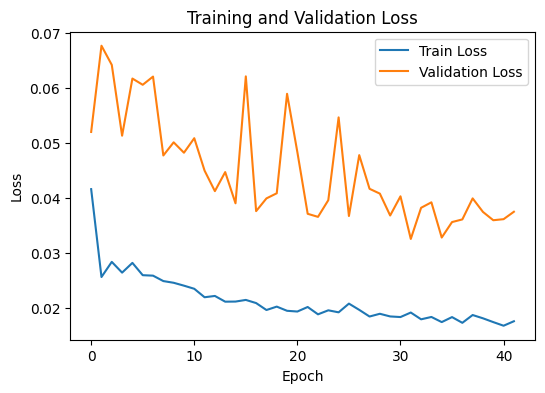

In [15]:
# Plotting the training and validation accuracy
plt.figure(figsize=(6, 4))

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
# Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get original scale

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step


In [17]:
# Evaluate the Model
y_test_actual = scaler.inverse_transform([y_test])  # Inverse transform for actual values
mae = mean_absolute_error(y_test_actual[0], predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 82647.29216620585


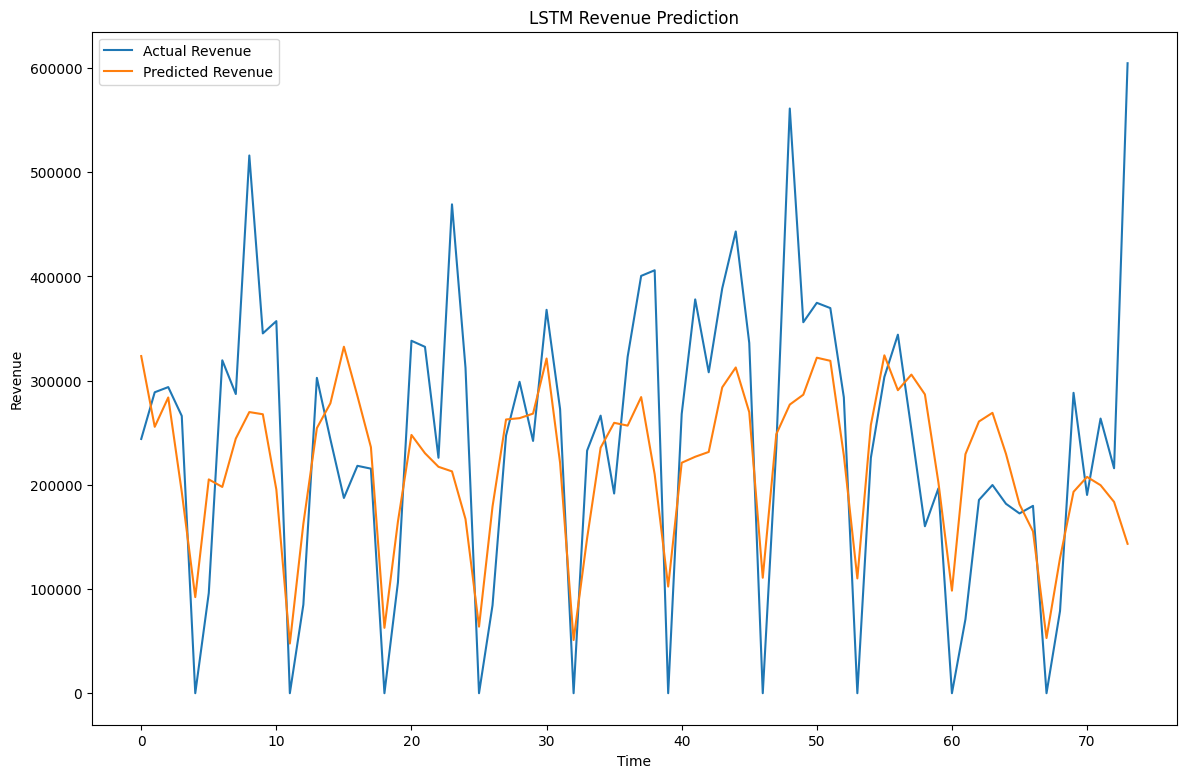

In [18]:
# Plot the Results
plt.plot(y_test_actual[0], label='Actual Revenue')
plt.plot(predictions, label='Predicted Revenue')
plt.title('LSTM Revenue Prediction')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.show()

### Comparison of ARIMA and LSTM Results:

* The LSTM model outperformed the ARIMA model in predicting revenue, as indicated by the lower Mean Absolute Error (MAE). The LSTM achieved an MAE of 75,008.98, while the best ARIMA model (order (2, 1, 1)) resulted in an MAE of 86,529.65.

* Visually, the LSTM predictions align more closely with the actual revenue data, capturing both trends and fluctuations better than ARIMA, which struggles with the larger deviations during spikes and drops in the data. This suggests that LSTM, with its ability to capture long-term dependencies and non-linear patterns, is better suited for forecasting this highly volatile revenue dataset compared to the linear ARIMA model. ARIMA still provides reasonable forecasts but seems less capable of handling the sharp fluctuations in the revenue data as compared to LSTM.